##  Linear Regression
Regression searches for relationships among variables. e.g, you can observe several employees of some company and try to understand how their salaries depend on the features, such as experience, level of education, role, city they work in, and so on.

This is a regression problem where data related to each employee represent one observation. The presumption is that experience, education, role, and city are independent features, while the salary depends on them.

Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them.

-- In other words, you need to find a function that maps some features or variables to others sufficiently well. -- The dependent features are called dependent variables, output, or responses. -- The independent features are called independent variables, input or predictions

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.

-- it is common practice to denote the outputs with y and inputs with x. if there are two or more independent variables, they can be represented as the vector x = (x1,....., xn)



## When do you need Regression?
### Relation or influence
Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine if and to what extent the experience or gender impact salaries. 

### Forecast Response
Regression is also useful when you want to forecast a response using a new set of predictors. For example, you could try to predict electricity consumption of a household for the next hour given the outdoor temperature, time of day, and number of residents in that household. 

-- Linear Regression is probably one of the most important and widely used regression techniques. It's among the simplest regression methods. One of its main advantages is the ease of interpreting results.




In [2]:

# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d



pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#% config InlineBackend.figure_formats= {pdf''}

% matplotlib inline
# Seaborn: Python's Statistical Data Visualization Library
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

UsageError: Line magic function `%` not found.


**Linear Regression with one Variable**

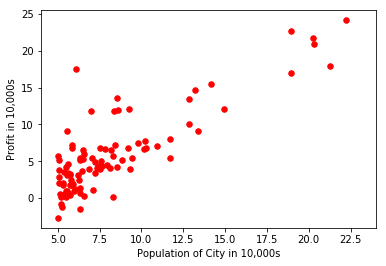

In [3]:
data = np.loadtxt('ex1data1.txt', delimiter = ',')

X= np.c_[np.ones(data.shape[0]), data[:,0]]
y= np.c_[data[:,1]]

                  
                  
# plotting the data
                  
plt.scatter(X[:,1], y, s = 30, c = 'r', marker = 'o', linewidths = 1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000s'); 

***Gradient Desecent***

In this part, we will fit the linear regression parameters Theta to our dataset using gradient descent.

***Gradient Descent***

Gradient descent is first order iterative optimization algorithem for finding the minimum of a function. 
s
-- To find a local minimum of a function using gradeint descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. 
-- If, instead, one takes steps proportional to the positive of the gradient, one instead takes steps proportional to the positive of the gradient, one approches a local maximum of that function.

In [4]:
'''
Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
'''
def computeCost(X, y, theta = [[0], [0]]):
    
    m = y.size # this define the limit
    J = 0 
    
    h = X.dot(theta) # h is the hypothesis given by the linear model
    J= 1/(2*m)*np.sum(np.square(h-y)) #updated eqn, The objective of linear reg is to minimize cost func
    return(J)
computeCost(X,y)

32.072733877455676

In [9]:
'''
Some given conditions:
iterations = 1500
alpha = 0.01
'''
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


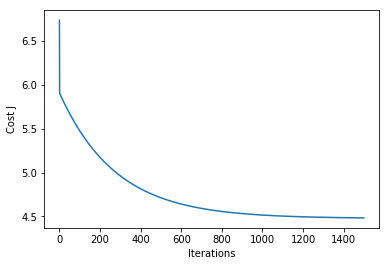

In [10]:

# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');


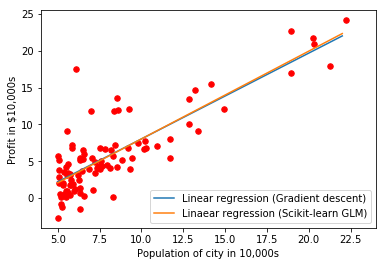

In [17]:
 # the final parameterswill be used  to plot the linear fit. 
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx     # y = c+ mx

# plotting the gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='o', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# comparing with Scikit-learn Linear regression
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label = 'Linaear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

***Pridict profit for a city with population of 35000 and 7000 ?***

In [22]:
# print(theta.T.dot([1, 3.5])*10000)
# print(theta.T.dot([1,7])*10000)

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)*10000
print(f'For population = 35,000, we predict a profit of {predict1}\n')

predict2 = np.dot([1, 7], theta)*10000
print(f'For population = 70,000, we predict a profit of {predict2}')

For population = 35,000, we predict a profit of [4519.7678677]

For population = 70,000, we predict a profit of [45342.45012945]


***Visualization***
To understand the cost function j(theta) better, we'll now plot the cost over a 2 dimensional grid of theta(0) and theta(1) values. Fot this how to write the code is not important it is more important to understand the visualization

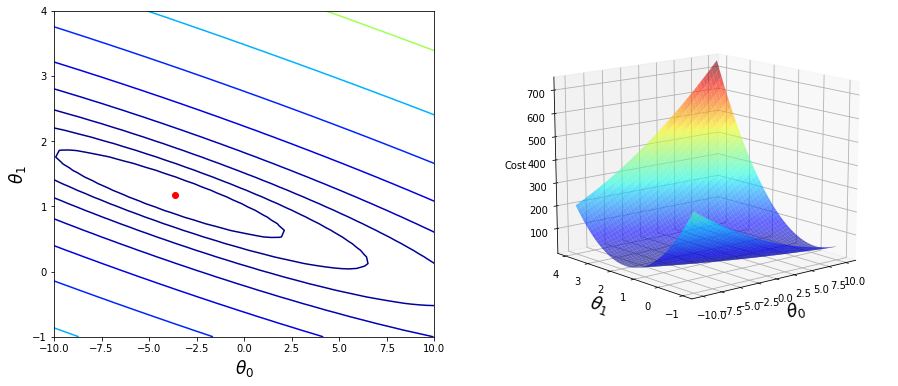

In [26]:
# Another way of visualization
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)